Today I'll try to predict wether the passenger survived or not during the Titanic Disaster

In [679]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [680]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

Convert NaN into 0

In [681]:
train = train.fillna(0)
test = test.fillna(0)

In [682]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I'm just want to inspect how many people survived from the disaster in the train dataset

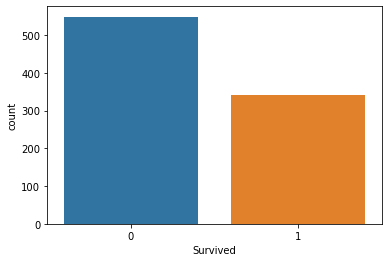

In [683]:
sns.countplot(train["Survived"])

It seems that the cabin code means something.

I think the first letter means something like the cabin position, so I'll group them by the first letter

In [684]:
cabin_type = []
cab = train["Cabin"]
for x in cab:
    if str(x)[0:1] not in cabin_type:
        cabin_type.append(str(x)[0:1])
        
        
cabin_type



['0', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

I also interested in Embarked colum

In [685]:
embarked = []
col = train["Embarked"]
for x in col:
    if str(x)[0:1] not in embarked:
        embarked.append(str(x)[0:1])
        
        
embarked


['S', 'C', 'Q', '0']

Since I still not able to use the string feature, so I'm gonna convert them to integer that represents their class

In [686]:

train["Cabin"] = [cabin_type.index(str(x)[0:1]) for x in train["Cabin"]]
test["Cabin"] = [cabin_type.index(str(x)[0:1]) for x in test["Cabin"]]

There's just a few people in the Cabin, 0 means NaN

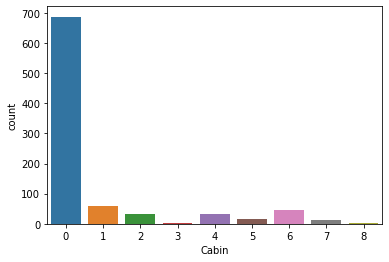

In [687]:
sns.countplot(train["Cabin"])

In [688]:
train["Sex"] = [int(x == "male") for x in train["Sex"]]
test["Sex"] = [int(x == "male") for x in test["Sex"]]
#1 = male

I know that most of the Titanic survivor is Female, I'm gonna ensure that

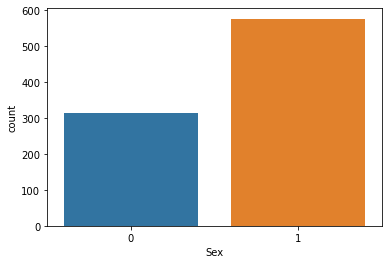

In [689]:
sns.countplot(train["Sex"])

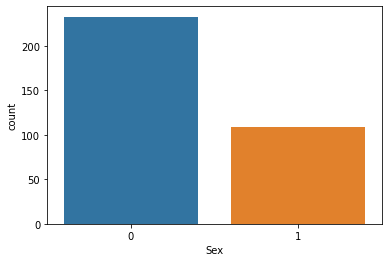

In [690]:
sns.countplot(train[train["Survived"] == 1]["Sex"])

The majority of Titanic Passengers are male but the survivors are mostly female.
(Ladies first, hats off)

Now I'm inspecting the Embarked column. I'm not sure what it is but I think that's the place where the Passenger get into the ship

In [691]:
train["Embarked"] = [embarked.index(str(x)) for x in train["Embarked"]]
test["Embarked"] = [embarked.index(str(x)) for x in test["Embarked"]]

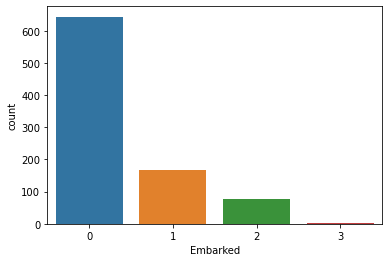

In [692]:
sns.countplot(train["Embarked"])

Here's the dataframe after I changed the string features, I guess the Name and Ticket won't do anything so I'll drop it later

In [693]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,6,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,1,2,W./C. 6607,23.4500,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,1


Let's inspect the correlation

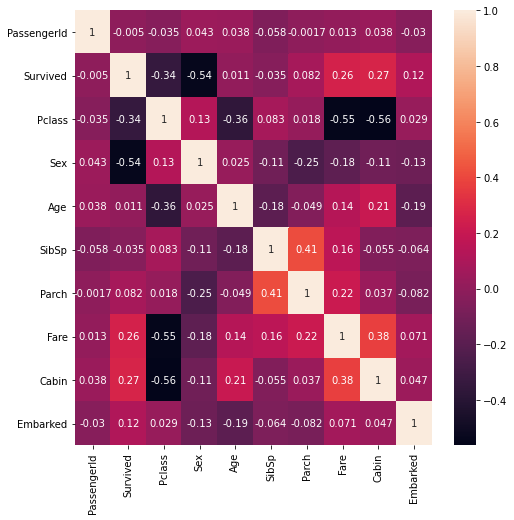

In [694]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(), annot=True)


In [695]:
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age            0.010539
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cabin          0.270310
Embarked       0.118026
Name: Survived, dtype: float64

Let's drop the features with less correlation to the Survived column

In [696]:
train = train.drop(["PassengerId", "Name", "Ticket", "Age", "SibSp", "Parch"], axis=1)
test = test.drop(["PassengerId", "Name", "Ticket", "Age", "SibSp", "Parch"], axis=1)

In [697]:
train

,Survived,Pclass,Sex,Fare,Cabin,Embarked
0,0,3,1,7.2500,0,0
1,1,1,0,71.2833,1,1
2,1,3,0,7.9250,0,0
3,1,1,0,53.1000,1,0
4,0,3,1,8.0500,0,0
...,...,...,...,...,...,...
886,0,2,1,13.0000,0,0
887,1,1,0,30.0000,6,0
888,0,3,0,23.4500,0,0
889,1,1,1,30.0000,1,1


In [698]:
test

,Pclass,Sex,Fare,Cabin,Embarked
0,3,1,7.8292,0,2
1,3,0,7.0000,0,0
2,2,1,9.6875,0,2
3,3,1,8.6625,0,0
4,3,0,12.2875,0,0
...,...,...,...,...,...
413,3,1,8.0500,0,0
414,1,0,108.9000,1,1
415,3,1,7.2500,0,0
416,3,1,8.0500,0,0


In [699]:
X_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]

Since the test dataframe has no label, so let's put all of the columns to X_test

In [700]:
X_test = test


# Logistic Regression

Let's try use the Logistic Regression

In [701]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [702]:
pred = logr.predict(X_test)
pred = [int(x >= 0.5) for x in pred]

This cell is to make the submission spreadsheet

In [703]:
my_submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

# Deep Neural Network

I'm also trying to use Deep Neural Network

In [704]:
from keras.models import *
# from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential()
model.add(Dense(32))
model.add(Activation("tanh"))
model.add(Dense(64))
model.add(Activation("tanh"))
model.add(Dense(256))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer = Adam(1e-4),
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [705]:
early_stop = EarlyStopping(patience=50, verbose=1, monitor='val_accuracy', mode='max')
reduce_lr =  ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_delta=1e-4, mode='max')

In [706]:
model.fit(X_train, 
          y_train, 
          validation_split = 0.3,
          callbacks=[early_stop],
          epochs = 500)

Epoch 1/500
20/20 [==============================] - 0s 10ms/step - loss: 0.7134 - accuracy: 0.4848 - val_loss: 0.6596 - val_accuracy: 0.6269
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.6019 - val_loss: 0.6322 - val_accuracy: 0.6418
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6051 - val_loss: 0.6097 - val_accuracy: 0.6604
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6324 - accuracy: 0.6709 - val_loss: 0.5932 - val_accuracy: 0.7537
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6581 - val_loss: 0.5731 - val_accuracy: 0.7388
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.6533 - val_loss: 0.5603 - val_accuracy: 0.7463
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5995 - accuracy: 0.6918 - val_loss: 0.5517 - val_accuracy: 0.7463
Epoch 8/500


Epoch 59/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7817 - val_loss: 0.4571 - val_accuracy: 0.7836
Epoch 60/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7753 - val_loss: 0.4550 - val_accuracy: 0.7836
Epoch 61/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7769 - val_loss: 0.4542 - val_accuracy: 0.7873
Epoch 62/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7801 - val_loss: 0.4533 - val_accuracy: 0.7873
Epoch 63/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.7801 - val_loss: 0.4543 - val_accuracy: 0.7873
Epoch 64/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7769 - val_loss: 0.4535 - val_accuracy: 0.7873
Epoch 65/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7769 - val_loss: 0.4538 - val_accuracy: 0.7873
Epoch 

20/20 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7753 - val_loss: 0.4514 - val_accuracy: 0.7836
Epoch 117/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7785 - val_loss: 0.4460 - val_accuracy: 0.7873
Epoch 118/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7769 - val_loss: 0.4507 - val_accuracy: 0.7873
Epoch 119/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7769 - val_loss: 0.4518 - val_accuracy: 0.7873
Epoch 120/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7785 - val_loss: 0.4521 - val_accuracy: 0.7910
Epoch 121/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.7833 - val_loss: 0.4515 - val_accuracy: 0.7873
Epoch 122/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7785 - val_loss: 0.4505 - val_accuracy: 0.7873
Epoch 123/500

In [707]:
pred = model.predict(X_test)
pred = [int(x >= 0.5) for x in pred]

This also for the submission spreadsheet

In [708]:
NN_sub = pd.DataFrame({'PassengerId': passenger_id, 'Survived': pred})
# you could use any filename. We choose submission here
NN_sub.to_csv('submission_NN.csv', index=False)

# Conclusion

My Logistic Regression model is only scored around 0.75, and my Neural Network model is only scored around 0.73

I have to improve this tomorrow, My goal is above 0.85